# SRGAN 활용하기

## 프로젝트 1. : 직접 고른 이미지로 SRGAN 실험하기

### 프로젝트 1-1.

In [2]:
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
image_path = os.getenv('HOME')+'/aiffel/super_resolution/img1.jpg'
hr_image = cv2.imread(image_path)
hr_image = cv2.cvtColor(hr_image, cv2.COLOR_BGR2RGB)

(1080, 1920, 3)


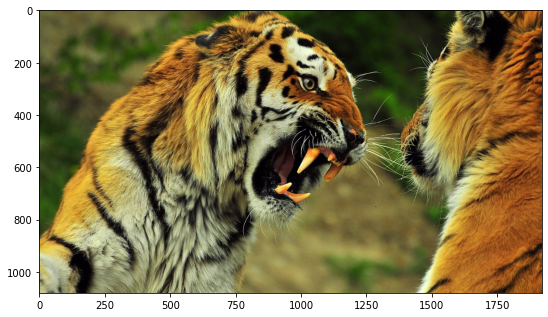

In [4]:
hr_shape = hr_image.shape[:2]

print(hr_image.shape) # 이미지의 크기를 출력합니다.

plt.figure(figsize=(9,6))
plt.imshow(hr_image)

(270, 480, 3)


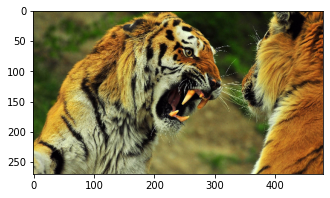

In [5]:
lr_image = cv2.resize(hr_image, dsize=(1920//4,1080//4)) # (가로 픽셀 수, 세로 픽셀 수)


bicubic_image = cv2.resize(
    lr_image, 
    dsize=(1920, 1080), # (가로 픽셀 수, 세로 픽셀 수)
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)


print(lr_image.shape)

plt.figure(figsize=(6,3))
plt.imshow(lr_image)

In [6]:
images = [bicubic_image, hr_image]
titles = ["bicubic", "HR"]

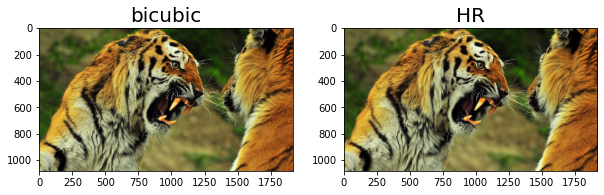

In [7]:
plt.figure(figsize=(10,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,2,i+1)
    plt.imshow(image)
    plt.title(title, fontsize=20)

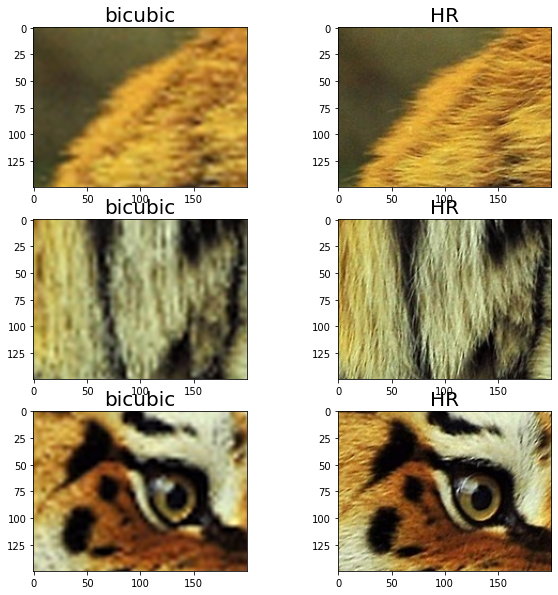

In [8]:
# 특정 영역을 잘라낼 함수를 정의합니다.
def crop(image, left_top, x=150, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]


# 잘라낼 영역의 좌표를 정의합니다.
left_tops = [(300,200)] *2 + [(500,600)] *2 + [(200,900)] *2

plt.figure(figsize=(10,10))
for i, (image, left_top, title) in enumerate(zip(images*3, left_tops, titles*3)):
    plt.subplot(3,2,i+1)
    plt.imshow(crop(image, left_top))
    plt.title(title, fontsize=20)

미리 학습된 모델을 사용한다.

In [9]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [10]:
import numpy as np

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

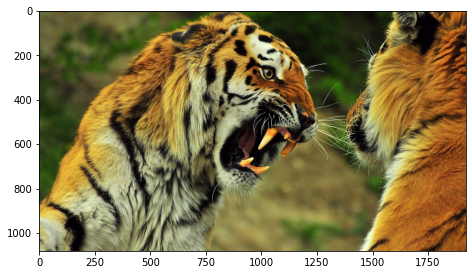

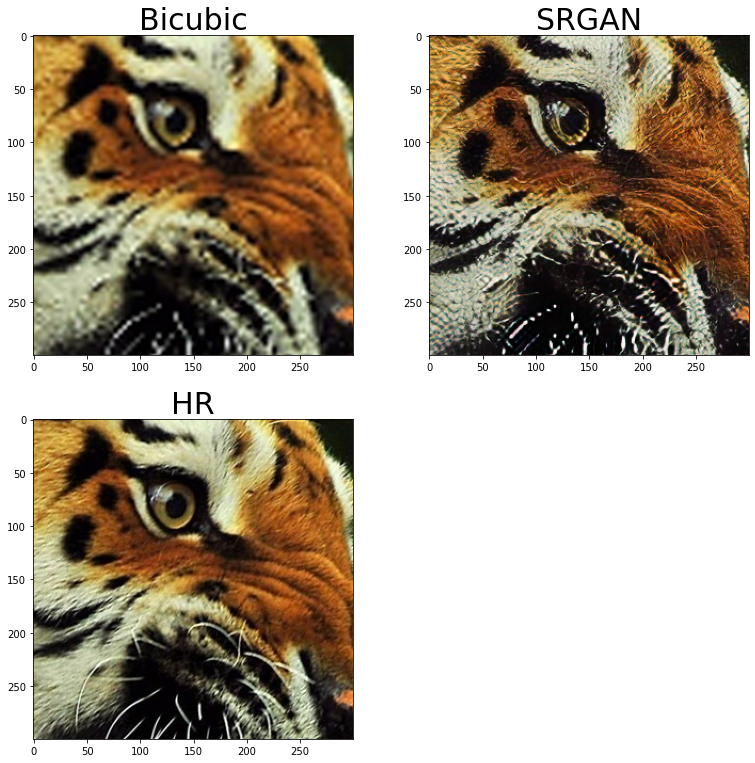

In [11]:

lr_img, hr_img = lr_image.copy(), hr_image.copy()
bicubic_img1 = cv2.resize(
    lr_img, 
    (hr_image.shape[1], hr_image.shape[0]), 
    interpolation=cv2.INTER_CUBIC
)


plt.figure(figsize=(20,15))
plt.subplot(311); plt.imshow(hr_img)

srgan_img = apply_srgan(lr_img)

images = [bicubic_img1, srgan_img, hr_img]
titles = ["Bicubic", "SRGAN", "HR"]

left_top = (200, 900)

plt.figure(figsize=(13,20))
for i, pind in enumerate([321, 322, 323]):
    plt.subplot(pind)
    plt.imshow(crop(images[i], left_top, 300, 300))
    plt.title(titles[i], fontsize=30)

### 프로젝트 1-2.

In [12]:
image_path2 = os.getenv('HOME')+'/aiffel/super_resolution/img2.jpg'
hr_image2 = cv2.imread(image_path2)
hr_image2 = cv2.cvtColor(hr_image2, cv2.COLOR_BGR2RGB)

(281, 500, 3)


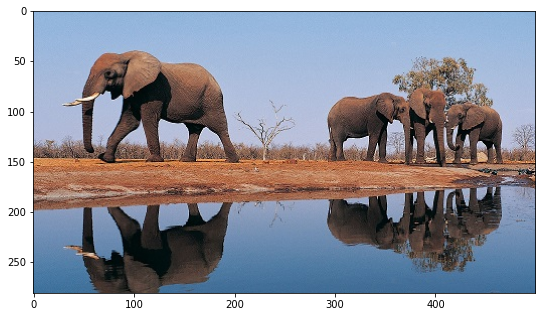

In [13]:
hr_shape2 = hr_image2.shape[:2]

print(hr_image2.shape) # 이미지의 크기를 출력합니다.

plt.figure(figsize=(9,6))
plt.imshow(hr_image2)

Text(0.5, 1.0, 'SRGAN')

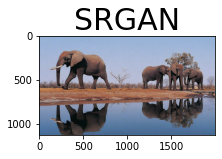

In [14]:
titles = ["HR", "SRGAN"]


hr_img2 = hr_image2.copy()

srgan_img2 = apply_srgan(hr_img2)


plt.subplot(211); plt.imshow(srgan_img2)
plt.title(titles[1], fontsize=30)

In [15]:
hr_img2.shape

(281, 500, 3)

In [16]:
bicubic_img2 = cv2.resize(
    hr_img2, 
    (500*4, 281*4), 
    interpolation=cv2.INTER_CUBIC
)

Text(0.5, 1.0, 'SRGAN')

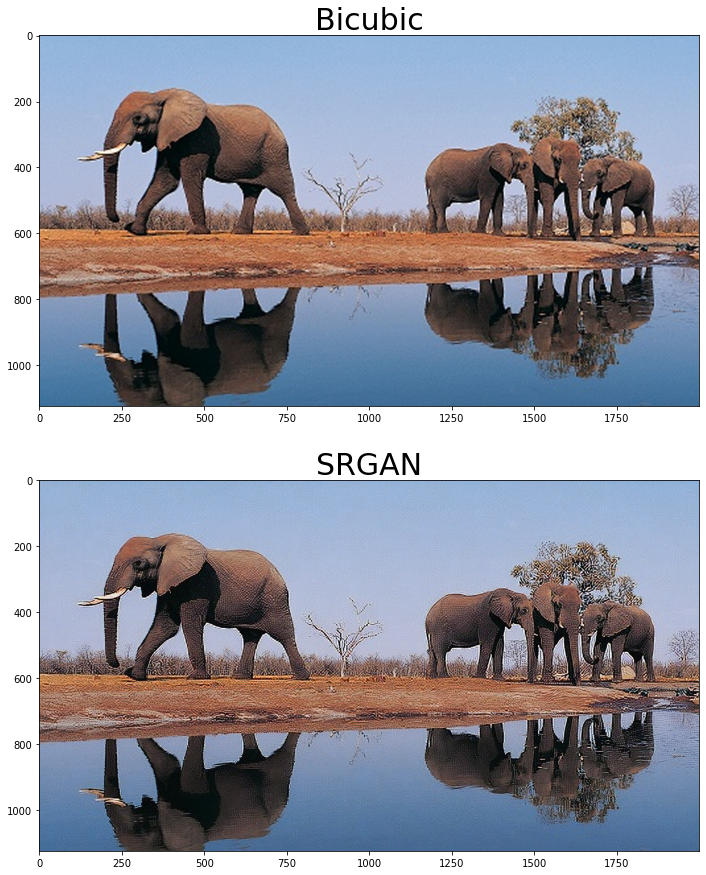

In [17]:
titles = ["Bicubic", "SRGAN"]


plt.figure(figsize=(20,15))
plt.subplot(211); plt.imshow(bicubic_img2)
plt.title(titles[0], fontsize=30)

plt.subplot(212); plt.imshow(srgan_img2)
plt.title(titles[1], fontsize=30)

### 프로젝트 2 : SRGAN을 이용해 고해상도 GIF 생성하기

In [18]:
import cv2
import os

# 다운받은 파일의 경로를 설정해 주세요.
gif = cv2.VideoCapture(os.getenv('HOME') +'/aiffel/super_resolution/wine_lr.gif')

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 13
frame 크기 : (340, 355, 3)
